### Convolutional NN with Keras (MNIST)

In [53]:
import numpy as np                                
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import keras as k
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

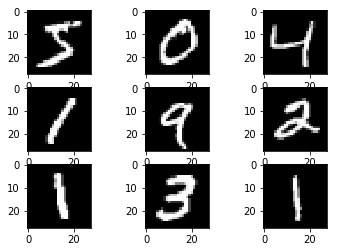

In [54]:
#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [55]:
#reshape into images
img_rows, img_cols = 28,28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [56]:
#normalise and center the mean 
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [57]:
# labels
num_classes=10
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

In [16]:
# build and compile the model  (roughly following the VGG paper)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 14x14x32

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 7x7x64 = 3136 neurons

model.add(Flatten())                        
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))

adm=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adm)

In [10]:
# train the model and evaluate on test data, with increasing batch size (doubling every two epochs)
for i in range(7):
    k=8*2**i
    print("batch size "+str(k))
    model.fit(x_train, y_train, batch_size=k, epochs=2, validation_data=(x_test, y_test))

batch size 8
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 800s 13ms/step - loss: 0.2261 - acc: 0.9317 - val_loss: 0.0518 - val_acc: 0.9837
Epoch 2/2
60000/60000 [==============================] - 844s 14ms/step - loss: 0.1232 - acc: 0.9648 - val_loss: 0.0296 - val_acc: 0.9904
batch size 16
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 769s 13ms/step - loss: 0.0539 - acc: 0.9845 - val_loss: 0.0215 - val_acc: 0.9933
Epoch 2/2
60000/60000 [==============================] - 761s 13ms/step - loss: 0.0454 - acc: 0.9865 - val_loss: 0.0206 - val_acc: 0.9940
batch size 32
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 755s 13ms/step - loss: 0.0261 - acc: 0.9922 - val_loss: 0.0144 - val_acc: 0.9950
Epoch 2/2
60000/60000 [==============================] - 747s 12ms/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0177

In [16]:
#model.save('increasedBatch2epochs8to512.h5')
#saved it!
#model=load_model('increasedBatch2epochs8to512.h5')

In [58]:
# try image augmentation
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    #shear_range=0.5
    )

datagen.fit(x_train)

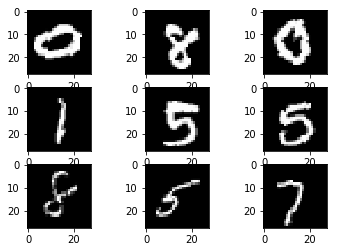

In [59]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [50]:
#for i in range(7):
#    k=8*2**i
#    print("batch size "+str(k))
#    model2.fit_generator(datagen.flow(x_train, y_train, batch_size=k),
#                     steps_per_epoch=len(x_train) / 32, epochs=2, validation_data=(x_test, y_test))